In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from scipy.stats.stats import ttest_ind
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'


engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

student_df = pd.read_sql_query('select * from studentsperformance',con=engine)


# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

### 1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

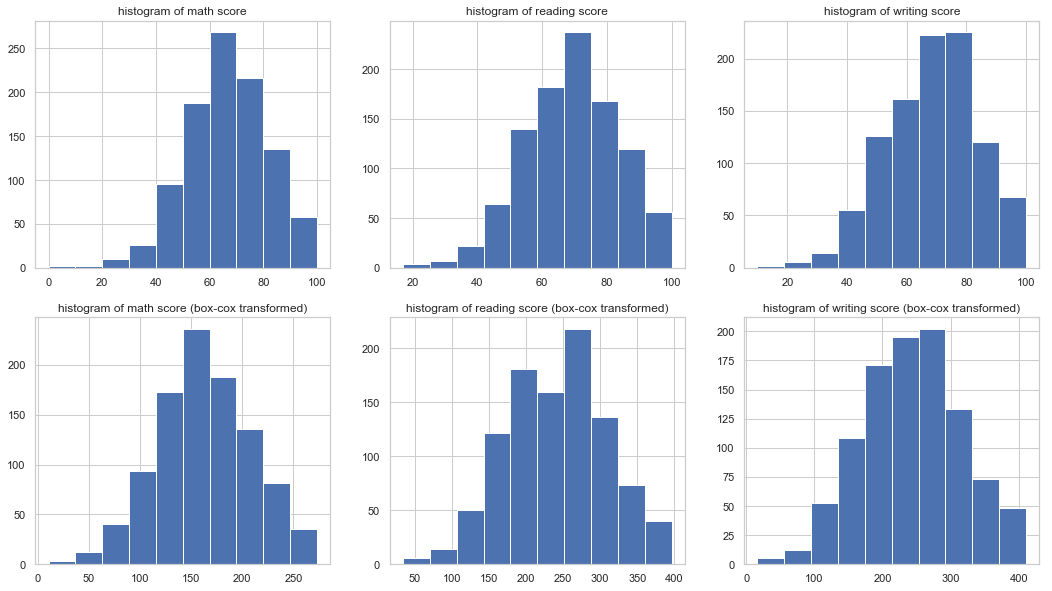

In [5]:
from scipy.stats import boxcox

# Exclude the observation where math score is equal to 0 since box-cox transformation only works with positive data

math_boxcox,_ = boxcox(student_df[student_df["math score"] > 0]["math score"])
reading_boxcox,_ = boxcox(student_df["reading score"])
writing_boxcox,_ = boxcox(student_df["writing score"])

plt.figure(figsize=(18,10))

plt.subplot(2, 3, 1)
plt.hist(student_df["math score"])
plt.title("histogram of math score")

plt.subplot(2, 3, 2)
plt.hist(student_df["reading score"])
plt.title("histogram of reading score")

plt.subplot(2, 3, 3)
plt.hist(student_df["writing score"])
plt.title("histogram of writing score")

plt.subplot(2, 3, 4)
plt.hist(math_boxcox)
plt.title("histogram of math score (box-cox transformed)")

plt.subplot(2, 3, 5)
plt.hist(reading_boxcox)
plt.title("histogram of reading score (box-cox transformed)")

plt.subplot(2, 3, 6)
plt.hist(writing_boxcox)
plt.title("histogram of writing score (box-cox transformed)")

plt.show()

No, they do not appear to be normally distributed since all graphs are skewed slightly to the right. After applying the Box-Cox transformation, the distribution does appear more normal. To confirm that the graphs were not normally distributed, we will perform Jarque-Bera and Normality tests for all three.

In [6]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(student_df["math score"])
norm_stats = normaltest(student_df["math score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(student_df["reading score"])
norm_stats = normaltest(student_df["reading score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(student_df["writing score"])
norm_stats = normaltest(student_df["writing score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 15.912256686712709 and p value is 0.0003505075386818213
Normality test statistics is 15.408960513931822 and p value is 0.00045080293869937836
Jarque-Bera test statistics is 11.383300575987892 and p value is 0.0033740202672214448
Normality test statistics is 11.11741279628622 and p value is 0.003853758403576582
Jarque-Bera test statistics is 13.98509448257235 and p value is 0.0009187033894586527
Normality test statistics is 13.606450837263859 and p value is 0.0011101885439899974


After applying the Box-Cox transformation, the distributions come closer to the normal distribution shape. The Jarque-Bera test also indicates that transformed variables are all normally distributed with a significance level of 5%.

In [7]:
jb_stats = jarque_bera(math_boxcox)
norm_stats = normaltest(math_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(reading_boxcox)
norm_stats = normaltest(reading_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(writing_boxcox)
norm_stats = normaltest(writing_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 1.720098104874378 and p value is 0.4231413256953709
Normality test statistics is 1.8323073377495822 and p value is 0.40005482895717037
Jarque-Bera test statistics is 4.119778575331906 and p value is 0.1274680814024559
Normality test statistics is 5.282274611852865 and p value is 0.07128015609575467
Jarque-Bera test statistics is 4.746478090040098 and p value is 0.09317842784055597
Normality test statistics is 6.267311355043339 and p value is 0.04355827085023795


### 2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

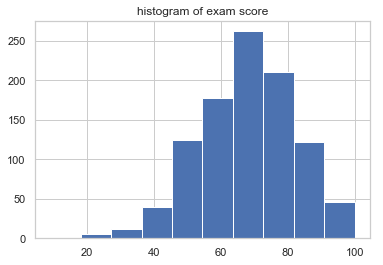

Jarque-Bera test statistics is 15.453387913085168 and p value is 0.00044089934264401887
Normality test statistics is 15.186721327231322 and p value is 0.0005037851534494478


In [8]:
exam_score = (student_df["math score"] +
              student_df["reading score"] + student_df["writing score"])/3

plt.hist(exam_score)
plt.title("histogram of exam score")
plt.show()

jb_stats = jarque_bera(exam_score)
norm_stats = normaltest(exam_score)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

It is pretty clear just from looking at the histogram that this new variable is not normally distributed. We will apply a Box-Cox transformation to normalize the variable:

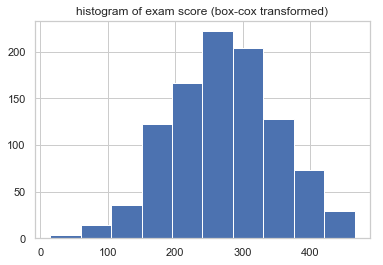

Jarque-Bera test statistics is 2.4353987431906026 and p value is 0.29591016374203183
Normality test statistics is 2.779857245981238 and p value is 0.2490930835165177


In [9]:
exams_boxcox,_ = boxcox(exam_score)

plt.hist(exams_boxcox)
plt.title("histogram of exam score (box-cox transformed)")
plt.show()

jb_stats = jarque_bera(exams_boxcox)
norm_stats = normaltest(exams_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

After applying the Box-Cox transformation, the data does appear to be normally distributed, and we confirm by performing Jarque-Bera and Normal tests.

### 3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

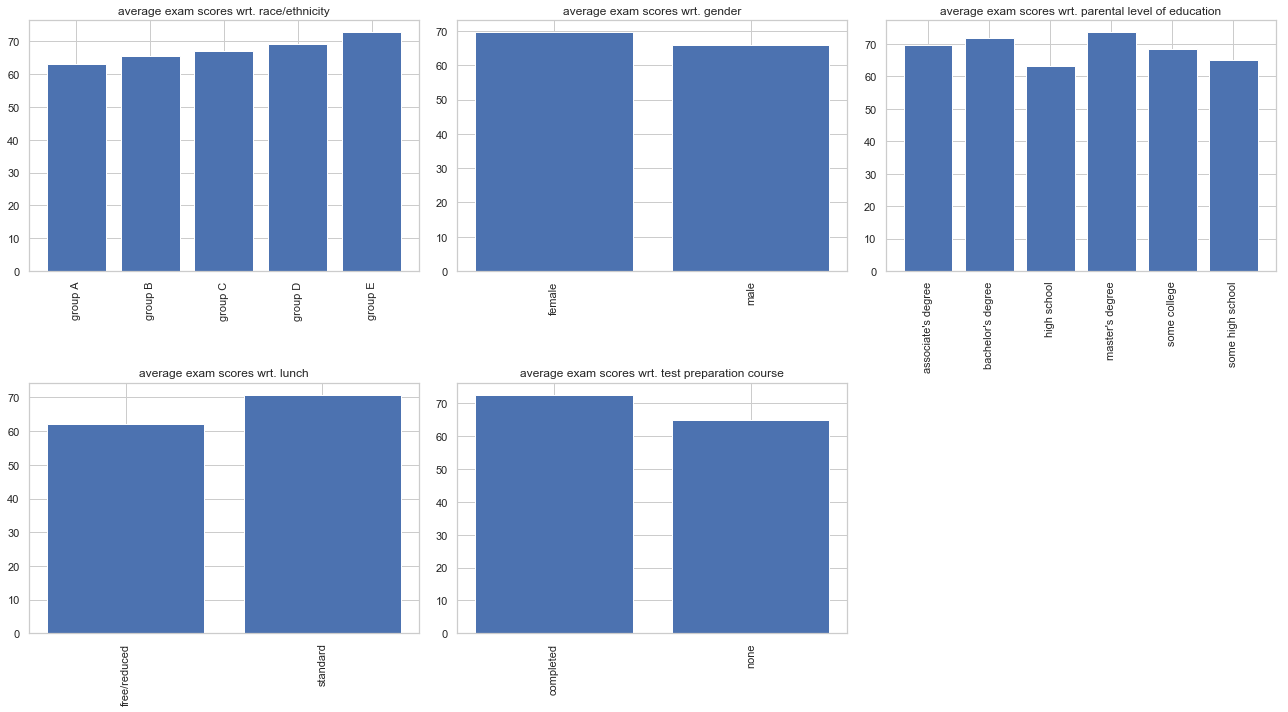

In [11]:
student_df["exam_score"] = exam_score

plt.figure(figsize=(18, 10))


plt.subplot(2, 3, 1)
plt.bar(student_df.groupby("race/ethnicity")
        ["exam_score"].mean().index, student_df.groupby("race/ethnicity")["exam_score"].mean())
plt.title("average exam scores wrt. race/ethnicity")
plt.xticks(rotation="vertical")


plt.subplot(2, 3, 2)
plt.bar(student_df.groupby("gender")
        ["exam_score"].mean().index, student_df.groupby("gender")["exam_score"].mean())
plt.title("average exam scores wrt. gender")
plt.xticks(rotation="vertical")


plt.subplot(2, 3, 3)
plt.bar(student_df.groupby("parental level of education")
        ["exam_score"].mean().index, student_df.groupby("parental level of education")["exam_score"].mean())
plt.title("average exam scores wrt. parental level of education")
plt.xticks(rotation="vertical")


plt.subplot(2, 3, 4)
plt.bar(student_df.groupby("lunch")
        ["exam_score"].mean().index, student_df.groupby("lunch")["exam_score"].mean())
plt.title("average exam scores wrt. lunch")
plt.xticks(rotation="vertical")


plt.subplot(2, 3, 5)
plt.bar(student_df.groupby("test preparation course")
        ["exam_score"].mean().index, student_df.groupby("test preparation course")["exam_score"].mean())
plt.title("average exam scores wrt. test preparation course")
plt.xticks(rotation="vertical")

plt.tight_layout()
plt.show()

- Average exam score increases from group A to group E, so race/ethnicity might be useful in explaining success on the exams
- Females are slighly more successful on the exams than males
- It also seems like the higher the parents' level of education, the better the students do on the exams
- The students who have standard lunch do better on the exams than the students who have free/reduced lunch, likely because of a gap in wealth. More wealthy = more resorces for education
- The students who completed the test preparation course did better on the exams than the students who did not take a test prep course

In conclusion, all of these variables could be used to explain the relative success of students on these exams.